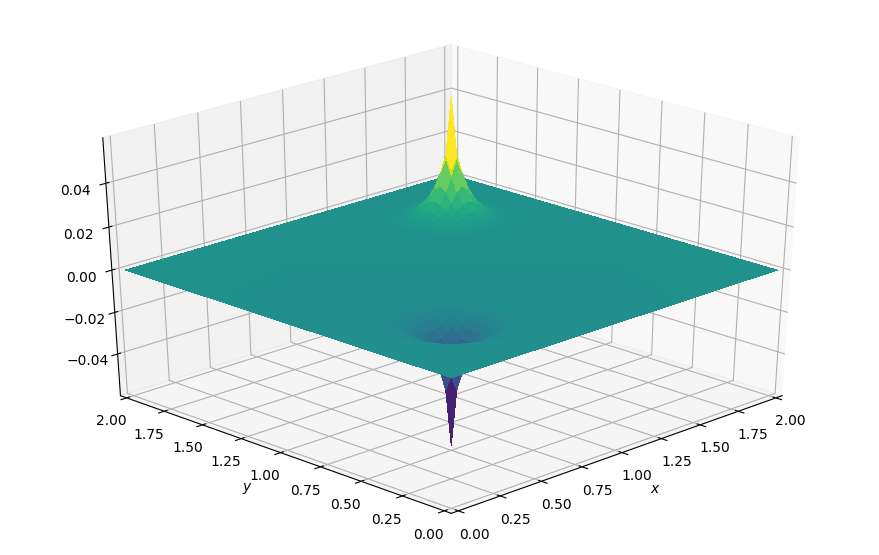

In [7]:
import numpy
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

def plot2D(x, y, p):
    fig = pyplot.figure(figsize=(11,7), dpi=100)
    ax = fig.gca(projection='3d')
    X, Y = numpy.meshgrid(x, y)
    surf = ax.plot_surface(X, Y, p[:], rstride=1, cstride=1, cmap=cm.viridis,
            linewidth=0, antialiased=False)
    ax.set_xlim(0, 2)
    ax.set_ylim(0, 2)
    ax.view_init(30, 225)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    
#variables
nx = 61
ny = 61
nt = 50
xmin = 0
xmax = 2
ymin = 0
ymax = 2
dx = (xmax - xmin) / (nx - 1)
dy = (ymax - ymin) / (ny - 1)

p = numpy.zeros((ny, nx))
pn = numpy.zeros((ny, nx))
b = numpy.zeros((ny, nx))
x = numpy.linspace(xmin, xmax, nx)
y = numpy.linspace(ymin, ymax, ny)

#source
b[int(ny/4), int(nx/4)] = 100
b[int(3*ny/4), int(3*nx/4)] = -100

#2d poissons eqn
for it in range(nt):
    pn = p.copy()
    p[1:-1,1:-1] = ((dy**2 * (pn[1:-1, 2:] + pn[1:-1, 0:-2]) + 
                     dx**2 * (pn[2:, 1:-1] + pn[0:-2, 1:-1]) - 
                     b[1:-1,1:-1] * dx**2 * dy**2) / 
                     (2 * (dx**2 + dy**2)))
    p[0, :] = 0
    p[-1, :] = 0
    p[:, 0] = 0
    p[:, -1] = 0
    
plot2D(x, y, p)